# User Behaviour Analysis

### Importing Required Libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None) # display more texts in column
pd.set_option('display.max_rows', 500)

from numpy import dot
from numpy.linalg import norm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

### Reading Data

In [144]:
df=pd.read_json('./dataset.json',lines=True)

### Getting overview of data

In [146]:
df=pd.read_json('./dataset.json',lines=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78319 entries, 0 to 78318
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   action     78319 non-null  object        
 1   timestamp  78319 non-null  datetime64[ns]
 2   step       78319 non-null  int64         
 3   user       78319 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.4+ MB


In [148]:
print ('Shape of dataframe:', df.shape)

Shape of dataframe: (78319, 4)


In [149]:
df.head(20)

,action,timestamp,step,user
0,copy_exp_code,2019-06-18 00:55:56.961999872,1,1
1,copy_exp_code,2019-06-18 00:56:58.655000064,1,1
2,copy_exp_code,2019-06-18 00:57:19.124999936,1,1
3,copy_exp_code,2019-06-18 00:57:40.276999936,1,1
4,copy_exp_code,2019-06-18 00:58:24.291000064,1,1
5,copy_exp_code,2019-06-18 00:58:56.136999936,1,1
6,copy_exp_code,2019-06-18 00:59:44.412999936,1,1
7,copy_exp_code,2019-06-18 01:00:27.908999936,1,1
8,copy_exp_code,2019-06-18 01:01:00.347000064,1,1
9,copy_exp_code,2019-06-18 01:01:55.430000128,1,1


In [28]:
df.isnull().sum()

action       0
timestamp    0
step         0
user         0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.action.value_counts()

leave_middle_aoi             13274
leave_right_aoi              11539
scrollbar_M_forward          10179
ipynb_layout_(write_code)     9402
scrollbar_M_back              5713
scrollbar_R_forward           5406
leave_left_aoi                4487
tag_add_by_click              2733
scrollbar_R_back              2639
scrollbar_L_forward           1949
ipynb_layout_(add_box)        1770
scrollbar_L_back              1291
tag_add_by_panel              1263
scrollbar_X                   1110
tab_exp                        998
tab_other                      940
copy_exp_code                  768
click_on_code_by_1             666
copy_left                      582
copy_google                    452
tag_remove_by_click            358
left_button_copy               318
copy_exp_output                153
tag_remove_by_panel            128
tab_pra                        123
resize_browser                  38
copy_pra_code                   32
click_on_code_by_3               8
Name: action, dtype:

### Grouping users as per their performance

In [153]:
high_performers=[2, 3, 6, 8, 9, 11, 14, 42, 46, 50, 58]

In [154]:
def categorize_user_level(value):
    return 'High Performer' if value in high_performers else  'Low Performer'

In [155]:
df_eda=df.copy()
df_eda['level']=df_eda['user'].map(categorize_user_level)

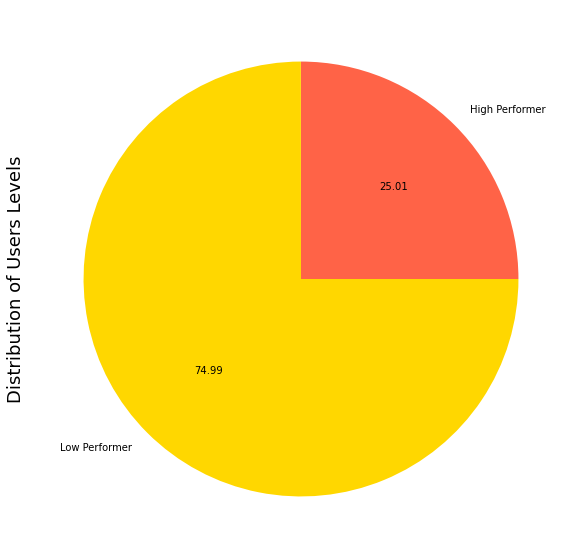

In [157]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 10))

df_eda.groupby('level').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 10},
                                  colors=['tomato', 'gold'], ax=ax1)
ax1.set_ylabel('Distribution of Users Levels', size=18)
plt.show()

In [162]:
hp_df=df_eda[df_eda.level=='High Performer']
lp_df=df_eda[df_eda.level=='Low Performer']
print(hp_df.shape,' ', lp_df.shape)

(19587, 5)   (58732, 5)


### Generating corpus of `action` column to pass to the model

In [164]:
corpus = [row.split(',') for row in df['action']]# Overall corpus of action
corpus_hp = [row.split(',') for row in hp_df['action']]# High performing users action corpus to be tested seperately
corpus_lp = [row.split(',') for row in df['action']]# Low performing users action corpus to be tested seperately

In [200]:
def gensim_model(cor):
    
    model = Word2Vec(cor, min_count=1,vector_size=50,workers=3, window =3, sg = 1)
    model.train(corpus,total_examples=len(cor),epochs=10)
    return model

### Testing out the closest actions to external search overally

In [201]:
overall_model=gensim_model(corpus)
overall_model.wv.most_similar('tab_other')

[('scrollbar_R_back', 0.17922037839889526),
 ('scrollbar_M_forward', 0.14386184513568878),
 ('tag_remove_by_click', 0.11257510632276535),
 ('tag_remove_by_panel', 0.10867806524038315),
 ('copy_exp_code', 0.0950523391366005),
 ('ipynb_layout_(add_box)', 0.09462708234786987),
 ('left_button_copy', 0.05041617155075073),
 ('scrollbar_M_back', 0.04007358103990555),
 ('scrollbar_R_forward', 0.0232339259237051),
 ('tag_add_by_click', 0.008223670534789562)]

In [203]:
distance=model.wv.distance('tab_other','scrollbar_R_back')
print(distance)

0.8207796365022659


### Cosine Similiarity

In [204]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model.wv.get_index(word)
    for item in target_list :
        if item != word :
            b = model.wv.get_index(item)
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [205]:
action = list(df.action.unique())
cosine_distance (model,'tab_other',action,10) 

C:\Users\Najib\AppData\Local\Temp\ipykernel_42876\4134364152.py:8: RuntimeWarning: invalid value encountered in true_divide
  cos_sim = dot(a, b)/(norm(a)*norm(b))


[('copy_exp_code', 1.0),
 ('copy_exp_output', 1.0),
 ('copy_google', 1.0),
 ('copy_left', 1.0),
 ('ipynb_layout_(add_box)', 1.0),
 ('ipynb_layout_(write_code)', 1.0),
 ('leave_left_aoi', 1.0),
 ('leave_middle_aoi', nan),
 ('leave_right_aoi', 1.0),
 ('scrollbar_L_back', 1.0)]

### Testing out the closest actions to external search separetly for different users

#### High Performing Users

In [206]:
hp_model=gensim_model(corpus_hp)
hp_model.wv.most_similar('tab_other')

[('leave_right_aoi', 0.19010192155838013),
 ('scrollbar_X', 0.18857939541339874),
 ('copy_exp_code', 0.17440010607242584),
 ('resize_browser', 0.14239904284477234),
 ('ipynb_layout_(add_box)', 0.11519221216440201),
 ('scrollbar_R_forward', 0.10159838944673538),
 ('leave_middle_aoi', 0.08061254024505615),
 ('tag_remove_by_click', 0.07563064992427826),
 ('scrollbar_M_forward', 0.04067765921354294),
 ('click_on_code_by_3', 0.031875014305114746)]

In [207]:
distance=hp_model.wv.distance('tab_other','leave_right_aoi')
print(distance)

0.8098980933427811


In [208]:
action = list(hp_df.action.unique())
cosine_distance (hp_model,'tab_other',action,10) 

C:\Users\Najib\AppData\Local\Temp\ipykernel_42876\4134364152.py:8: RuntimeWarning: invalid value encountered in true_divide
  cos_sim = dot(a, b)/(norm(a)*norm(b))


[('click_on_code_by_1', 1.0),
 ('copy_exp_code', 1.0),
 ('copy_left', 1.0),
 ('ipynb_layout_(add_box)', 1.0),
 ('ipynb_layout_(write_code)', 1.0),
 ('leave_left_aoi', 1.0),
 ('leave_middle_aoi', 1.0),
 ('leave_right_aoi', 1.0),
 ('left_button_copy', 1.0),
 ('scrollbar_L_back', 1.0)]

In [209]:
lp_model=gensim_model(corpus_lp)
lp_model.wv.most_similar('tab_other')

[('scrollbar_R_back', 0.17922037839889526),
 ('scrollbar_M_forward', 0.14386184513568878),
 ('tag_remove_by_click', 0.11257510632276535),
 ('tag_remove_by_panel', 0.10867806524038315),
 ('copy_exp_code', 0.0950523391366005),
 ('ipynb_layout_(add_box)', 0.09462708234786987),
 ('left_button_copy', 0.05041617155075073),
 ('scrollbar_M_back', 0.04007358103990555),
 ('scrollbar_R_forward', 0.0232339259237051),
 ('tag_add_by_click', 0.008223670534789562)]

In [210]:
distance=lp_model.wv.distance('tab_other','scrollbar_R_back')
print(distance)

0.8207796365022659


In [199]:
action = list(lp_df.action.unique())
cosine_distance (lp_model,'tab_other',action,10) 

C:\Users\Najib\AppData\Local\Temp\ipykernel_42876\4134364152.py:8: RuntimeWarning: invalid value encountered in true_divide
  cos_sim = dot(a, b)/(norm(a)*norm(b))


[('copy_exp_code', 1.0),
 ('copy_exp_output', 1.0),
 ('copy_google', 1.0),
 ('copy_left', 1.0),
 ('ipynb_layout_(add_box)', 1.0),
 ('ipynb_layout_(write_code)', 1.0),
 ('leave_left_aoi', 1.0),
 ('leave_middle_aoi', nan),
 ('leave_right_aoi', 1.0),
 ('scrollbar_L_back', 1.0)]